In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
column_names=['user_id','item_id','rating','timestamp']
data=pd.read_csv("ml-100k/u.data",sep='\t',names=column_names)

In [4]:
data.head(10)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [5]:
data.shape

(100000, 4)

In [6]:
movies_title=pd.read_csv("ml-100k/u.item",sep='\|',header=None)

In [7]:
movies_title.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
total_users=len(data['user_id'].unique())

In [9]:
print(total_users)

943


In [10]:
total_movies=data['item_id'].nunique()

In [11]:
print(total_movies)

1682


In [12]:
movies_title=movies_title[[0,1]]

In [13]:
movies_title.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
movies_title.columns=['item_id','name']

In [15]:
movies_title.head()

,item_id,name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
final_df=pd.merge(data,movies_title,on=['item_id'])

In [17]:
final_df.head(10)

,user_id,item_id,rating,timestamp,name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [18]:
final_df.shape

(100000, 5)

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
sns.set_style('darkgrid')

In [21]:
final_df.groupby('name').mean()['rating'].sort_values(ascending=False)

name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [22]:
final_df.groupby('name').count()['rating'].sort_values(ascending=False)

name
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [23]:
ratings=pd.DataFrame(final_df.groupby('name').mean()['rating'])

In [24]:
ratings.head(10)

,rating
name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [25]:
ratings['no of ratings']=pd.DataFrame(final_df.groupby('name').count()['rating'])

In [26]:
ratings.head(10)

,rating,no of ratings
name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


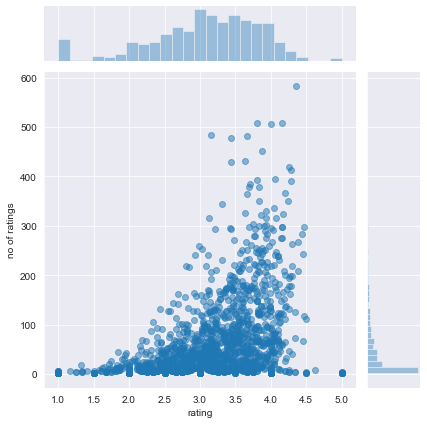

In [27]:
sns.jointplot(x='rating',y='no of ratings',data=ratings,alpha=0.5)

In [28]:
moviematrix=pd.pivot_table(final_df,index='user_id',columns='name',values='rating')

In [29]:
moviematrix

name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ratings.sort_values('no of ratings',ascending=False)

,rating,no of ratings
name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [36]:
star_wars=moviematrix['Star Wars (1977)']

In [37]:
star_wars

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [38]:
similar_to_starwars=moviematrix.corrwith(star_wars)

In [39]:
similar_to_starwars

name
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [40]:
similar_to_starwars_movie=pd.DataFrame(similar_to_starwars,columns=['similarity'])

In [41]:
similar_to_starwars_movie

,similarity
name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [42]:
similar_to_starwars_movie=similar_to_starwars_movie.join(ratings['no of ratings'])

In [43]:
similar_to_starwars_movie.dropna(inplace=True)

In [44]:
similar_to_starwars_movie=similar_to_starwars_movie[similar_to_starwars_movie["no of ratings"]>50]

In [45]:
similar_to_starwars_movie

,similarity,no of ratings
name,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
...,...,...
"Wizard of Oz, The (1939)",0.266335,246
Wolf (1994),0.113214,67
"Wrong Trousers, The (1993)",0.216204,118


In [46]:
similar_to_starwars_movie=similar_to_starwars_movie[similar_to_starwars_movie['no of ratings']>50 ]

In [47]:
similar_to_starwars_movie

,similarity,no of ratings
name,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
...,...,...
"Wizard of Oz, The (1939)",0.266335,246
Wolf (1994),0.113214,67
"Wrong Trousers, The (1993)",0.216204,118


In [48]:
similar_to_starwars_movie=similar_to_starwars_movie.sort_values('similarity',ascending=False)

In [49]:
similar_to_starwars_movie

,similarity,no of ratings
name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51
...,...,...
Excess Baggage (1997),-0.239936,52
"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",-0.241561,54
"Walk in the Clouds, A (1995)",-0.257007,63


# prediction function


In [50]:
def predict(moviename):
    movie_rating=moviematrix[moviename]
    similar_to_movie=moviematrix.corrwith(movie_rating)
    similardf=pd.DataFrame(similar_to_movie,columns=['similarity'])
    similardf.dropna(inplace=True)
    similardf=similardf.join(ratings['no of ratings'])
    similardf=similardf[similardf['no of ratings']>50 ].sort_values('similarity',ascending=False)
    return similardf

In [61]:
sample_movie="Deconstructing Harry (1997)"

In [62]:
predictions=predict(sample_movie)

In [63]:
print(predictions)

                             similarity  no of ratings
name                                                  
Demolition Man (1993)          1.000000             92
Deconstructing Harry (1997)    1.000000             65
Conan the Barbarian (1981)     0.878310            107
Days of Thunder (1990)         0.866025             53
Escape from L.A. (1996)        0.845154             91
...                                 ...            ...
Santa Clause, The (1994)      -1.000000             82
Copycat (1995)                -1.000000             86
Aristocats, The (1970)        -1.000000             54
Arrival, The (1996)           -1.000000             83
Black Sheep (1996)            -1.000000             55

[591 rows x 2 columns]


In [52]:
movie=input("enter movie name with first later capital")

enter movie name with first later capitalTitanic


In [53]:
year=input("enter the year of release")

enter the year of release1997


In [54]:
moviename=movie+" ("+year+")"

In [58]:
print(type(moviename))
print(moviename)

<class 'str'>
Titanic (1997)


In [56]:
predictions=predict(moviename)

In [64]:
print(predictions.head(10))

                                      similarity  no of ratings
name                                                           
Demolition Man (1993)                   1.000000             92
Deconstructing Harry (1997)             1.000000             65
Conan the Barbarian (1981)              0.878310            107
Days of Thunder (1990)                  0.866025             53
Escape from L.A. (1996)                 0.845154             91
Space Jam (1996)                        0.845154             93
My Left Foot (1989)                     0.823876            121
Jumanji (1995)                          0.790569             96
Bad Boys (1995)                         0.785714             57
Robin Hood: Prince of Thieves (1991)    0.785714             75
